###  First neural network example with keras 

##### Learning goals: (1) Use keras to fit a deep learning model; (2) A new way to handle missing data

Input Variables (X):

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [5]:
# load the dataset. 
dataset = pd.read_csv('https://raw.githubusercontent.com/wangx346/MAS651/main/diabetes.csv', header=0)

In [6]:
print(dataset.shape)
dataset.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###### The Outcome Column determines whether patient has diabetes or not (1-Diabetes,0-No Diabetes).Remaining other columns determine features which are essential for predicting .

In [7]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# '0' value in below columns makes no sense. Hence making them NaN.
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [27]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

###  ### Filling the Null Value By Imputing Using k-NN

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. 

In [9]:
# Filling the Null Value By Imputing Using k-NN
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)

In [32]:
dataset_t1 = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])

dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_t1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
## correlation matrix
corr = dataset.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


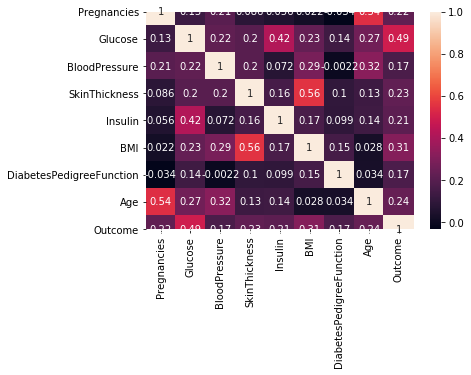

In [37]:
sns.heatmap(dataset.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

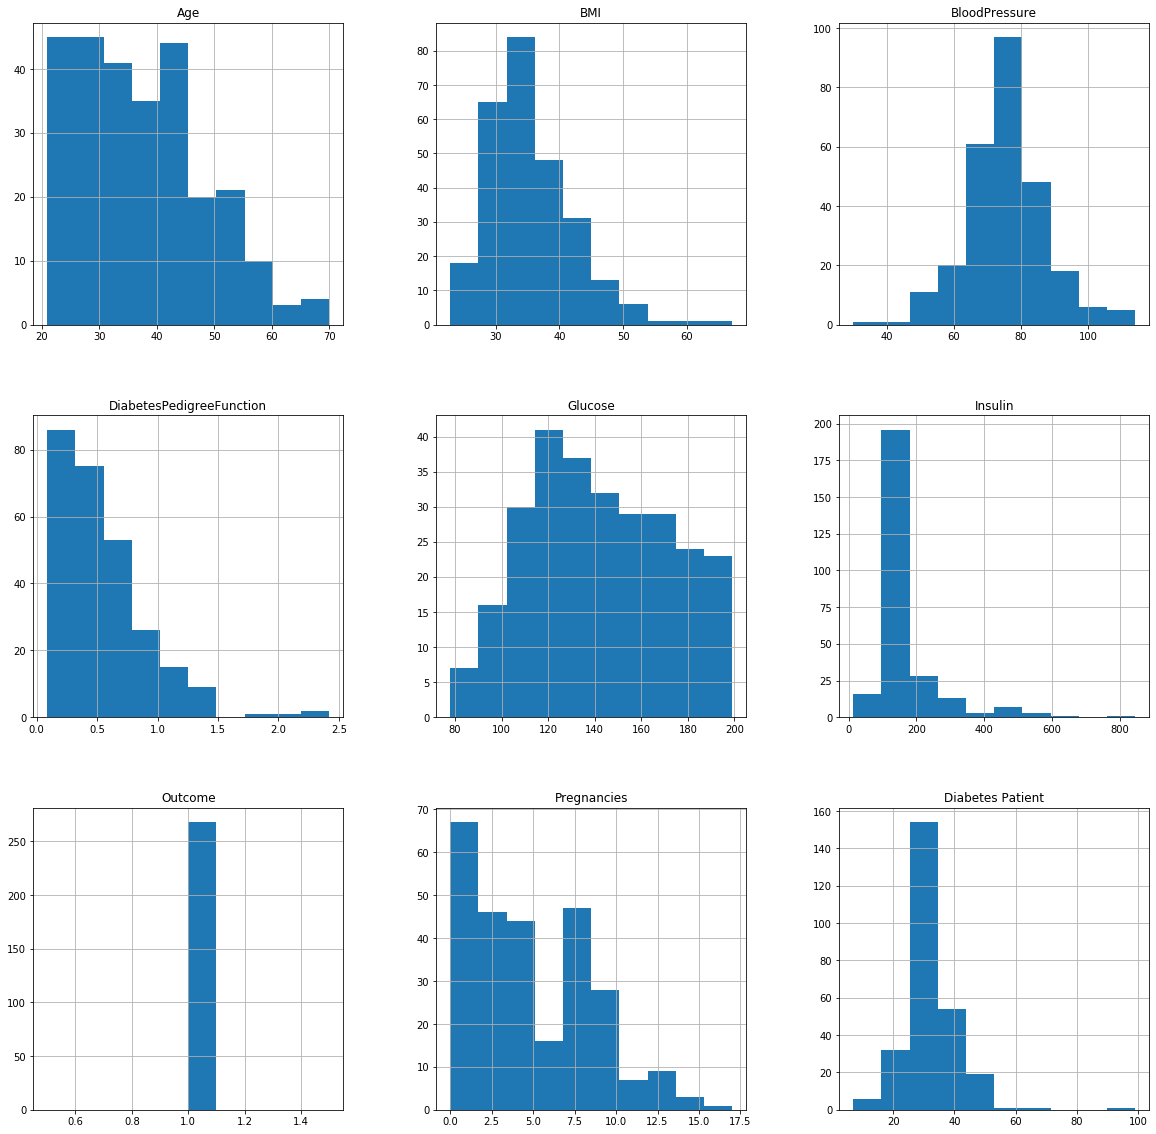

In [38]:
p = dataset[dataset['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

In [33]:
# Select last column of dataframe as a series
y = dataset.iloc[: , -1]

# # Select all but the last column of dataframe 
X = dataset.iloc[: , :-1]

#### One of the most important data transformations we need to apply is the features scaling. Basically most of the machine learning algorithms don't work very well if the features have a different set of values.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [43]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the training data
model.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
614/614 [==============================] - 1s 2ms/step - loss: 0.6598 - acc: 0.7866
Epoch 2/150
614/614 [==============================] - 0s 283us/step - loss: 0.5126 - acc: 0.8290
Epoch 3/150
614/614 [==============================] - 0s 205us/step - loss: 0.4064 - acc: 0.8306
Epoch 4/150
614/614 [==============================] - 0s 297us/step - loss: 0.3748 - acc: 0.8274
Epoch 5/150
614/614 [==============================] - 0s 328us/step - loss: 0.3675 - acc: 0.8274
Epoch 6/150
614/614 [==============================] - 0s 231us/step - loss: 0.3620 - acc: 0.8306
Epoch 7/150
614/614 [==============================] - 0s 227us/step - loss: 0.3598 - acc: 0.8339
Epoch 8/150
614/614 [==============================] - 0s 242us/step - loss: 0.3661 - acc: 0.8322
Epoch 9/150
614/614 [==============================] - 0s 229us/step - loss: 0.3529 - acc: 0.8355
Epoch 10/150
614/614 [==============================] - 0s 230us/step - loss: 0.3517 - acc: 0.8355
Epoch 11/150
614/614 

In [52]:
# evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

154/154 [==============================] - 0s 2ms/step
Accuracy: 75.97


### Let's try a different structure for the neural networks

In [46]:
model2 = Sequential()
#model.add(Dense(1000, input_dim=8, init='uniform', activation='relu')) # 1000 neurons
#model.add(Dense(100, init='uniform', activation='tanh')) # 100 neurons with tanh activation function
model2.add(Dense(500, init='uniform', activation='relu')) # 500 neurons
model2.add(Dense(1, init='uniform', activation='sigmoid')) # 1 output neuron

C:\Users\lxw19\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\lxw19\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [48]:
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model2.fit(X_train, y_train, nb_epoch=150, batch_size=10,  verbose=1) # 150 epoch, 10 batch size, verbose = 2


C:\Users\lxw19\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/150
614/614 [==============================] - 1s 1ms/step - loss: 0.5710 - acc: 0.7410
Epoch 2/150
614/614 [==============================] - 0s 136us/step - loss: 0.4700 - acc: 0.7671
Epoch 3/150
614/614 [==============================] - 0s 132us/step - loss: 0.4600 - acc: 0.7736
Epoch 4/150
614/614 [==============================] - 0s 162us/step - loss: 0.4523 - acc: 0.7899
Epoch 5/150
614/614 [==============================] - 0s 169us/step - loss: 0.4467 - acc: 0.7818
Epoch 6/150
614/614 [==============================] - 0s 132us/step - loss: 0.4445 - acc: 0.7915
Epoch 7/150
614/614 [==============================] - 0s 130us/step - loss: 0.4420 - acc: 0.7801
Epoch 8/150
614/614 [==============================] - 0s 130us/step - loss: 0.4355 - acc: 0.7932
Epoch 9/150
614/614 [==============================] - 0s 133us/step - loss: 0.4329 - acc: 0.7899
Epoch 10/150
614/614 [==============================] - 0s 130us/step - loss: 0.4309 - acc: 0.7866
Epoch 11/150
614/614 

In [49]:
# evaluate the model
_, accuracy = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

154/154 [==============================] - 0s 168us/step
Accuracy: 79.87
